In [1]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Importing Important Libraries

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from xgboost import XGBClassifier
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")
plt.style.use('ggplot')

import nltk
from nltk import word_tokenize

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer,TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from collections import Counter
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [3]:
from nltk.corpus import stopwords
import nltk
nltk.download('punkt')
!python -m nltk.downloader stopwords
!pip install xgboost

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


/usr/lib/python3.10/runpy.py:126: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


#Importing Datasets
>The dataset can be downloaded from <br>
https://www.kaggle.com/datasets/arhamrumi/amazon-product-reviews

In [4]:
dataset = pd.read_csv("/content/drive/MyDrive/datasets/Reviews.csv")

In [5]:
dataset.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


#Determining the dimensions of the dataset
>We can se that we have over 568454 number of reviews and over 10 features.

In [6]:
dataset.shape

(568454, 10)

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568438 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


#Handling missing values

In [8]:
dataset.isna().sum()

Id                         0
ProductId                  0
UserId                     0
ProfileName               16
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   27
Text                       0
dtype: int64

In [9]:
dataset.dropna()
# will drop the rows where the either of the columns is missing a value.

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...
568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...
568450,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o..."
568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...


In [10]:
dataset.duplicated().sum()
#there are no duplicate data

0


#Data visualization
>initially we determine the distributation of the rating of the products.



In [11]:
score_distribution = dataset['Score'].value_counts()/len(dataset)*100
score_distribution

5    63.878871
4    14.188483
1     9.194763
3     7.501047
2     5.236835
Name: Score, dtype: float64

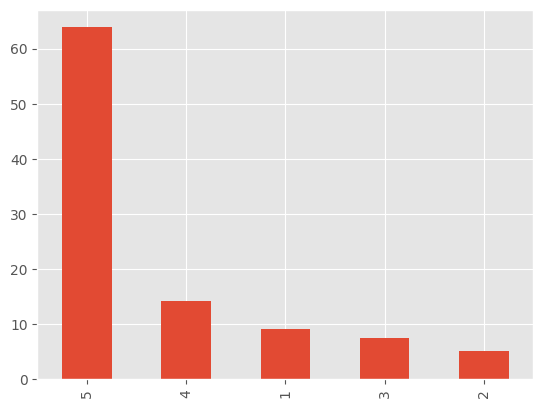

In [12]:
score_distribution.plot.bar()
plt.show()

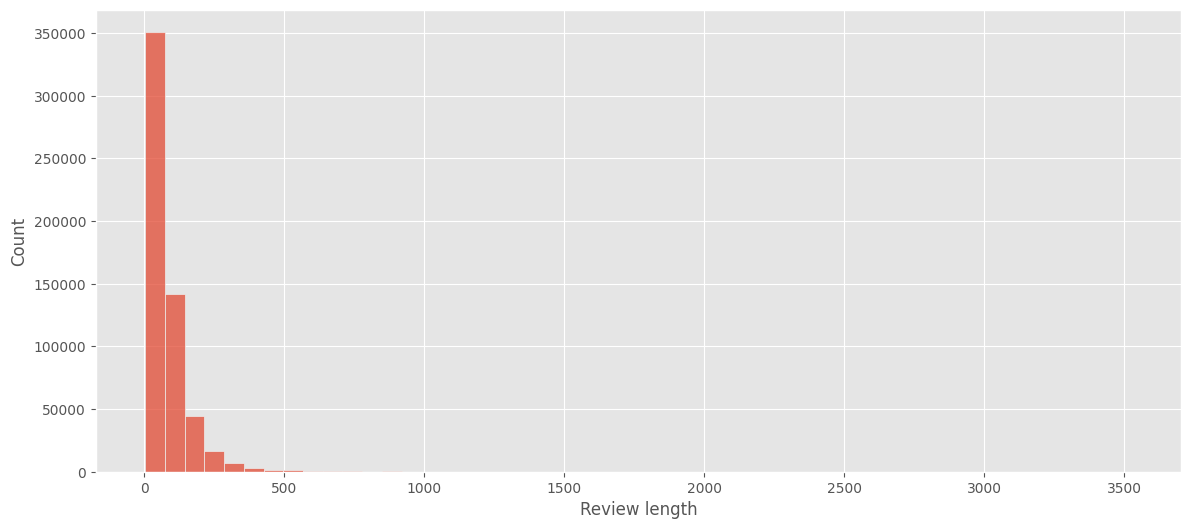

In [13]:
plt.figure(figsize=(14,6))
words_per_review = dataset['Text'].apply(lambda x :len(x.split(' ')))
sns.histplot(words_per_review,bins = 50)
plt.xlabel('Review length')
plt.show()

#Data preprocessing

> Extracting only the required information,
Score and the actual review.



In [14]:
from os import rename
new_dataset = pd.DataFrame(dataset, columns = ['Score','Text'])
new_dataset.rename(columns = {'Score':'Rating','Text':'Review'},inplace = True)

#The reviews which have less 3 rating we assume the review as negative and above 3 as positive.

In [15]:
def assigning_sentiment(rating):
  if rating <=3 :
    return 0
  else:
    return 1

#A new column for sentiment

In [16]:
new_dataset['Sentiment'] = new_dataset['Rating'].apply(assigning_sentiment)
new_dataset.drop(['Rating'],axis = 1 , inplace = True)

#Counting the total number of each sentiment

In [17]:
sentiment_values = new_dataset['Sentiment'].value_counts()
sentiment_values

1    443777
0    124677
Name: Sentiment, dtype: int64

#Data cleaning
>Using regular expression

In [18]:
def clean_text(Review):

    Review = str(Review).lower() # convert to lowercase
    Review = re.sub('\[.*?\]', '', Review)
    Review = re.sub('https?://\S+|www\.\S+', '', Review) # Remove URls
    Review = re.sub('<.*?>+', '', Review)
    Review = re.sub(r'[^a-z0-9\s]', '', Review) # Remove punctuation
    Review = re.sub('\n', '', Review)
    Review = re.sub('\w*\d\w*', '', Review)
    return Review

In [19]:
new_dataset['Review'] = new_dataset['Review'].apply(clean_text)


#Tokenization Process


In [20]:
stopwords = set(stopwords.words('english'))


In [21]:
#function for removing stopwords from reviews

def remove_stop_words(stopwords, review):
  #list comprehension for easy processing
  return [word for word in nltk.word_tokenize(review) if word not in stopwords]

In [22]:
new_dataset['clean_reviews'] = new_dataset['Review'].apply(lambda row : remove_stop_words(stopwords,row))

#Model building
> The accuracy of the model can be tweaked by changing or adding new paramaters to XGBClassifier.

In [28]:
X = new_dataset['clean_reviews']
y = new_dataset['Sentiment']

X_train , X_test, y_train, y_test = train_test_split(X,y,random_state= 42,test_size = 0.20)
X_train = [" ".join(words) for words in X_train]

xgboost_clf = Pipeline([
    ('vect', CountVectorizer(stop_words="english")),
    ('tfidf', TfidfTransformer()),
    ('classifier', XGBClassifier(
        learning_rate = 0.1,
        max_depth = 5,
        n_estimators = 100,
    )),
])

In [29]:
ft_model = xgboost_clf.fit(X_train,y_train)

In [30]:
X_test = [" ".join(words) for words in X_test]
y_predict = xgboost_clf.predict(X_test)

In [31]:
print('Training accuracy:', ft_model.score(X_train,y_train))
print('Test accuracy:', ft_model.score(X_test,y_test))

Training accuracy: 0.8380299188808237
Test accuracy: 0.8379115321353493


In [ ]:
print(classification_report(y_test,y_predict))


In [36]:
print(confusion_matrix(y_test,y_predict))

[[ 7356 17310]
 [ 1118 87907]]
